In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
## The different reaction pathways for Phenolic - Coal reactions
# First, we have to define the types of phenolic groups we have
# For this project we are working with 3 types of phenolic groups, described by the functional sites as shown below:
# Each of the phenol rings would have 2 functional sites,
# We have to define the position of the functional sites on the phenol rings

# The functional sites are numbered as shown below:
# Ph_2


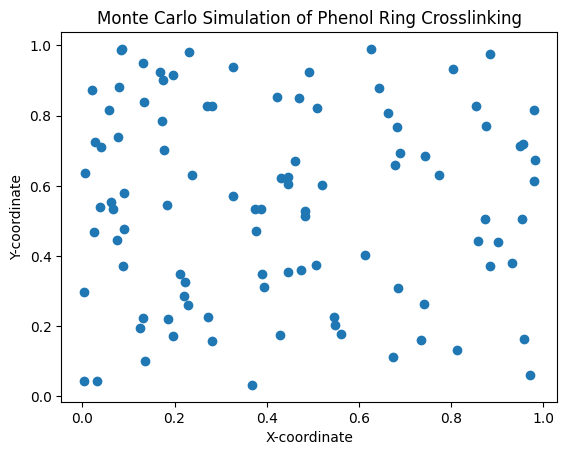

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class PhenolRing:
    def __init__(self, position, reactive_sites):
        self.position = position
        self.reactive_sites = reactive_sites

def distance_squared(pos1, pos2):
    return np.sum((pos1 - pos2)**2)

def is_within_capture_sphere(pos1, pos2, capture_radius_squared):
    return distance_squared(pos1, pos2) <= capture_radius_squared

def perform_crosslinking(phenol_ring1, phenol_ring2):
    # Perform crosslinking reaction between two phenol rings
    # Update positions or any other necessary attributes
    pass  # Placeholder, replace with actual code

# Monte Carlo Simulation Parameters
num_phenol_rings = 100
capture_radius_squared = 1.0  # Adjust as needed
num_simulation_steps = 1000

# Initialize phenol rings randomly on a grid
phenol_rings = [PhenolRing(np.random.rand(2), np.random.choice(['ortho', 'para'], size=2)) for _ in range(num_phenol_rings)]

# Perform Monte Carlo Simulation
for step in range(num_simulation_steps):
    # Choose two phenol rings randomly
    indices = np.random.choice(range(num_phenol_rings), size=2, replace=False)
    phenol_ring1, phenol_ring2 = phenol_rings[indices[0]], phenol_rings[indices[1]]

    # Check if reactive sites are compatible for crosslinking
    if phenol_ring1.reactive_sites[0] != phenol_ring2.reactive_sites[0] and phenol_ring1.reactive_sites[1] != phenol_ring2.reactive_sites[1]:
        # Check if the distance is within the capture sphere
        if is_within_capture_sphere(phenol_ring1.position, phenol_ring2.position, capture_radius_squared):
            # Perform crosslinking reaction
            perform_crosslinking(phenol_ring1, phenol_ring2)

# Visualization (2D scatter plot)
positions = np.array([ring.position for ring in phenol_rings])
plt.scatter(positions[:, 0], positions[:, 1], marker='o')
plt.title('Monte Carlo Simulation of Phenol Ring Crosslinking')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()


In [7]:
import numpy as np
import random as rand

class PhenolRing:
    def __init__(self, position, molecule_type):
        self.position = position
        self.molecule_type = molecule_type

def initial_random_matrix(n, ratio):
    state = np.zeros((n, n), dtype=int)
    void_ratio, phenol_ratio, coal_ratio = ratio

    for i in range(n):
        for j in range(n):
            r = rand.randint(1, void_ratio + phenol_ratio + coal_ratio)
            if r <= void_ratio:
                state[i][j] = 0  # Void
            elif r <= void_ratio + phenol_ratio:
                state[i][j] = 1  # Phenol
            else:
                state[i][j] = 2  # Coal
    
    return state

def get_rates(state, T, molecule):
    x, y = molecule.position
    periphery = state[x-1:x+2, y-1:y+2]

    k_ortho_phenol = 0.063
    k_para_phenol = 0.034
    k_ortho_coal = 0.45
    k_para_coal = 0.24

    p_ortho_phenol = 0.37
    p_para_phenol = 0.63
    p_ortho_coal = 0.85
    p_para_coal = 0.15

    total_curing_rate_phenol = 0
    total_curing_rate_coal = 0
    total_rate_no_rxn = 0

    for i in range(3):
        for j in range(3):
            if i == 1 and j == 1:
                continue
            elif periphery[i, j] == 1:
                k = rand.choices([k_ortho_phenol, k_para_phenol], [p_ortho_phenol, p_para_phenol])[0]
                total_curing_rate_phenol += (1/8) * k
            elif periphery[i, j] == 2:
                k = rand.choices([k_ortho_coal, k_para_coal], [p_ortho_coal, p_para_coal])[0]
                total_curing_rate_coal += (1/8) * k
            else:
                total_rate_no_rxn += (1/8)

    return total_curing_rate_phenol, total_curing_rate_coal, total_rate_no_rxn

# Example usage:
n = 10
ratio = (1, 1, 1)  # Adjust ratio as needed
initial_state = initial_random_matrix(n, ratio)
molecule = PhenolRing((5, 5), 1)  # Example phenol molecule at position (5, 5)
rates = get_rates(initial_state, 300, molecule)
print("Rates:", rates)


Rates: (0.01575, 0.1425, 0.375)
